## Minhas análises serão sobre:

1. 

In [1]:
##---------------------( Importar as bibliotecas )---------------------##
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap
import seaborn as sns
import numpy as np

##---------------------( Carregar os dados )---------------------##
dados = pd.read_excel('Dados-Analise-IA.xlsx', sheet_name='Necessidade')

# Primeira análise será pelo cadastro do visitante.


In [2]:
# visualizar os dados de forma resumida, com 5 itens somente
dados.head()

,Nome,Sobrenome,Email,Telefone,SetorAtuacao,Cargo,PublicoAlvo,PrincipaisDesafios,PrincipaisObjetivos,AreaConexao,ProcessosOtimizar,TipoConexao,PessoaProcesso,SistemasUtilizados,Local,ProcessosManuais,UsoCRM,ConhecimentoIntegracoes,Preferencias
0,Fernanda,Almeida,fernanda.almeida@email.com,(11) 98111-1111,Marketing,Gerente,Empresas de Tecnologia,Aumentar conversões,Melhorar a experiência do usuário,Marketing e Vendas,Gestão de Leads,Integração com Redes Sociais,Todos,CRM,Nuvem,Sim,Sim,Sim,Simplicidade
1,Ricardo,Silva,ricardo.silva@email.com,(21) 95222-2222,Finanças,Analista,Clientes Corporativos,Reduzir custos operacionais,Aumentar eficiência financeira,Finanças,Gestão Financeira,Nuvem,Todos,Excel,Nuvem,Não,Sim,Não,Modernidade
2,Carla,Oliveira,carla.oliveira@email.com,(31) 96333-3333,Vendas,Vendedor,PMEs,Ampliar carteira de clientes,Melhorar processo de vendas,Vendas,Gestão de Venda,Integração com E-commerce,Gestores,ERP e CRM,Local,Sim,Não,Sim,Simplicidade
3,Rodrigo,Santos,rodrigo.santos@email.com,(31) 95444-4444,Atendimento ao cliente,Supervisor,Consumidores Finais,Reduzir tempo de espera no atendimento,Manter alta satisfação do cliente,Atendimento ao cliente,Gestão de Atendimento,Nuvem,Assistentes,Software de suporte ao cliente,Nuvem,Não,Não,Sim,Personalização
4,Juliana,Lima,juliana.lima@email.com,(31) 96555-5555,Serviços,Coordenador,Pessoas Jurídicas,Agilizar processos internos,Melhorar comunicação interna,Serviços,Automação de Processos,Nuvem,Devs,Automacao e ERP,Nuvem,Sim,Sim,Não,Intuitividade


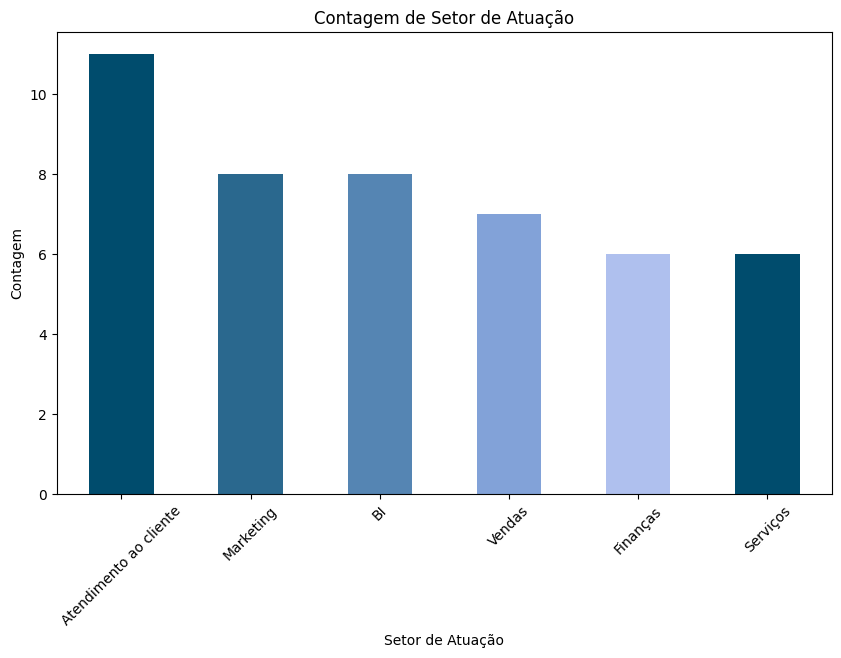

In [3]:
##---------------------( Setor de atuação )---------------------##

df_setor = pd.DataFrame(dados)

# Contagem de Setor de Atuação
contagem_setor = df_setor['SetorAtuacao'].value_counts()

# Paleta de cores
cores_azuis = ['#004c6d', '#2a688e', '#5585b3', '#82a2d8', '#afc0ee']

# Gráfico
plt.figure(figsize=(10, 6))
contagem_setor.plot(kind='bar', color=cores_azuis)
plt.title('Contagem de Setor de Atuação')
plt.xlabel('Setor de Atuação')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()


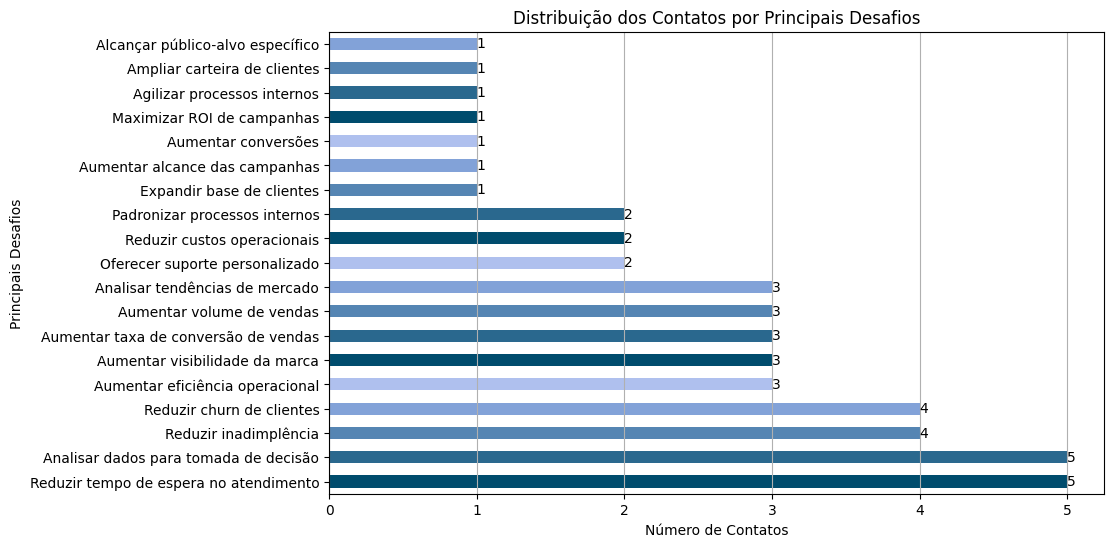

In [15]:
##---------------------( Desafios )---------------------##

# Contagem
contagem_por_desafios = dados['PrincipaisDesafios'].value_counts()

# Definindo uma paleta de cores em tons de azul
paleta_azul = ['#004c6d', '#2a688e', '#5585b3', '#82a2d8', '#afc0ee']

# Gráfico
plt.figure(figsize=(10, 6))
contagem_por_desafios.plot(kind='barh', color=paleta_azul)
plt.title('Distribuição dos Contatos por Principais Desafios')
plt.xlabel('Número de Contatos')
plt.ylabel('Principais Desafios')
plt.grid(axis='x')

# Adicionando os números em cada barra
for i, valor in enumerate(contagem_por_desafios):
    plt.text(valor, i, str(valor), ha='left', va='center')

plt.show()



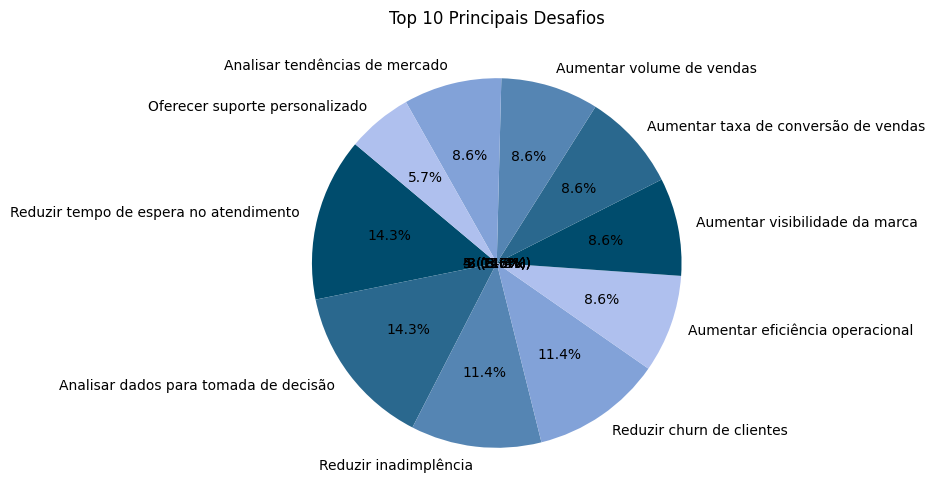

In [18]:
##---------------------( Desafios )---------------------##

df_desafios = pd.DataFrame(dados)

# Contagem de ocorrências de cada desafio
contagem_desafios = df_desafios['PrincipaisDesafios'].value_counts()

# Selecionar apenas o top 10
top_10_desafios = contagem_desafios.head(10)

# Paleta de cores em tons de azul
paleta_azul = ['#004c6d', '#2a688e', '#5585b3', '#82a2d8', '#afc0ee']

# Gráfico
plt.figure(figsize=(10, 6))
top_10_desafios.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=paleta_azul)
plt.title('Top 10 Principais Desafios')
plt.ylabel('')

# Adicionando os números em cada fatia
total = top_10_desafios.sum()
for i, valor in enumerate(top_10_desafios):
    plt.text(0, 0, f'{valor} ({valor/total*100:.1f}%)', ha='center', va='center')

plt.show()


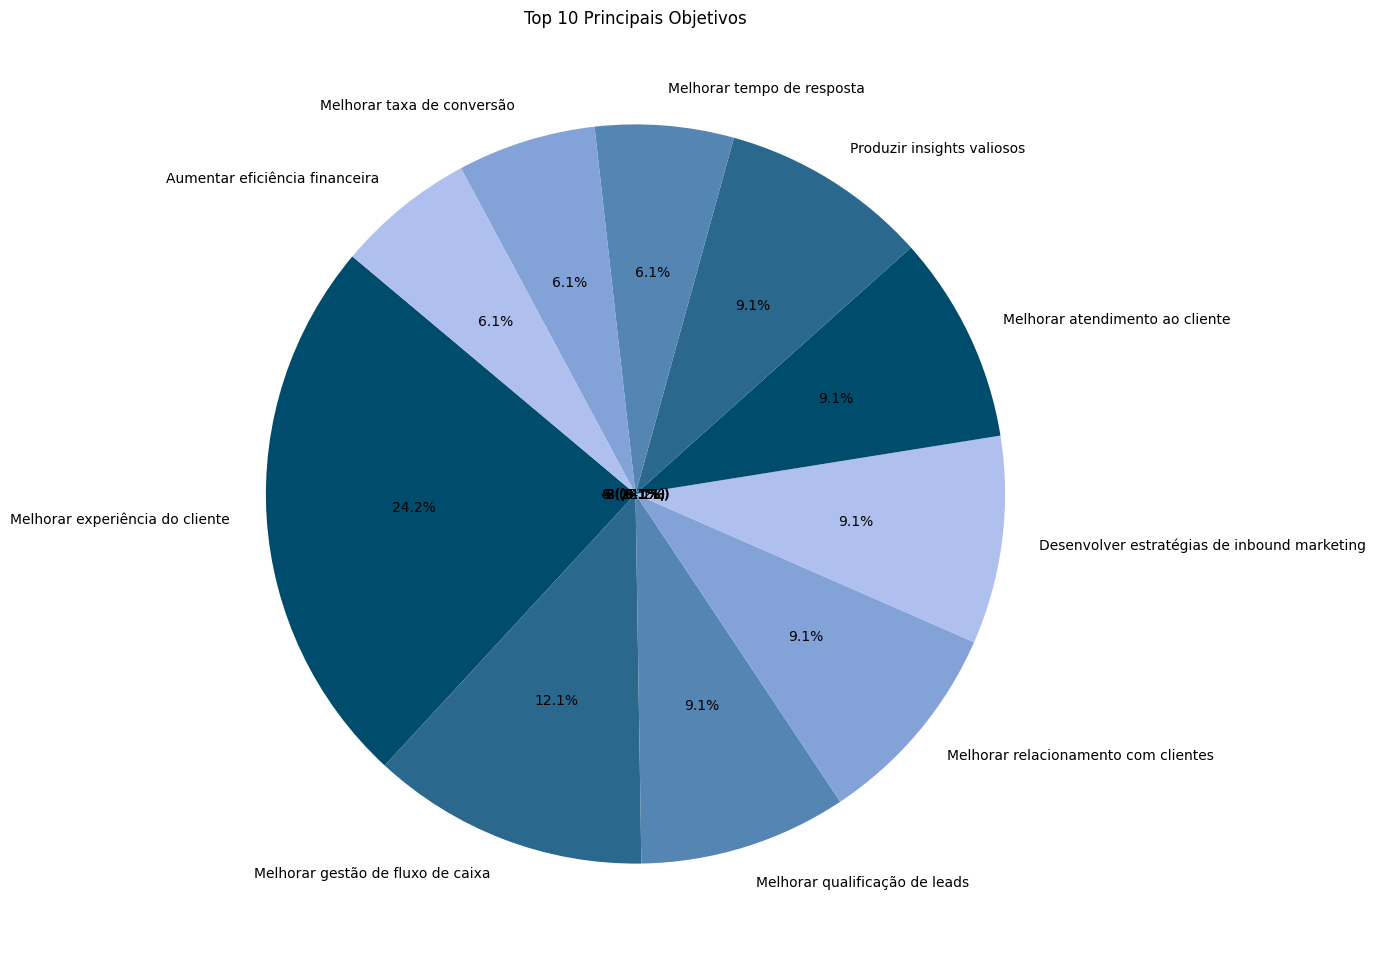

In [22]:
##---------------------( Objetivos )---------------------##

# Contagem de ocorrências de cada objetivo
contagem_objetivos = df_objetivos['PrincipaisObjetivos'].value_counts()

# Selecionar apenas o top 10
top_10_objetivos = contagem_objetivos.head(10)

# Gráfico
plt.figure(figsize=(12, 12))
top_10_objetivos.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=paleta_azul)
plt.title('Top 10 Principais Objetivos')
plt.ylabel('')

# Adicionando os números em cada fatia
total = top_10_objetivos.sum()
for i, valor in enumerate(top_10_objetivos):
    plt.text(0, 0, f'{valor} ({valor/total*100:.1f}%)', ha='center', va='center')

plt.show()


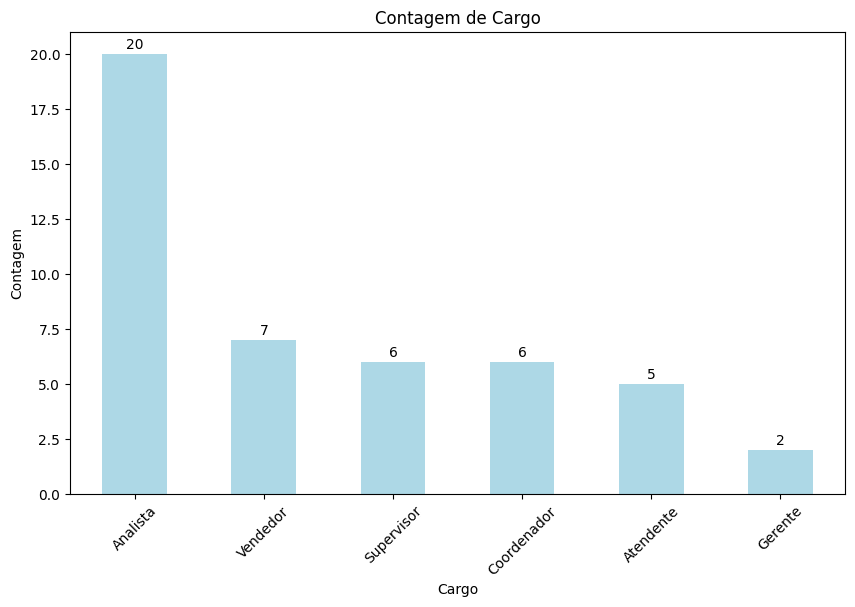

In [24]:
##---------------------( Cargo )---------------------##

# Contagem de Cargo
contagem_cargo = df_cargo['Cargo'].value_counts()

# Gráfico
plt.figure(figsize=(10, 6))
ax = contagem_cargo.plot(kind='bar', color='lightblue')
plt.title('Contagem de Cargo')
plt.xlabel('Cargo')
plt.ylabel('Contagem')
plt.xticks(rotation=45)

# Adicionando os números em cima de cada barra
for i, v in enumerate(contagem_cargo):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

plt.show()


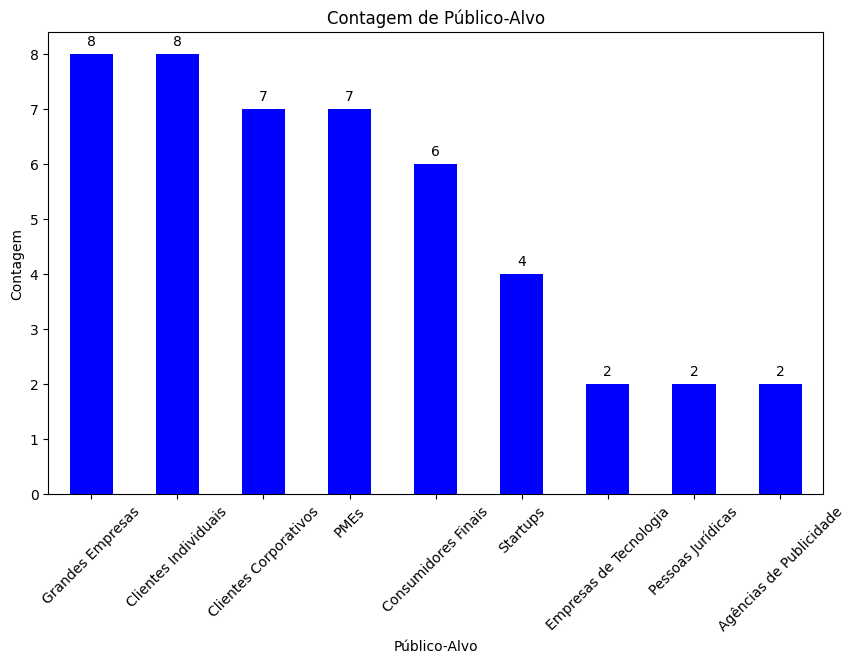

In [25]:
##---------------------( Objetivos )---------------------##

# Contagem de Público-Alvo
contagem_publico_alvo = df_publico['PublicoAlvo'].value_counts()

# Gráfico
plt.figure(figsize=(10, 6))
ax = contagem_publico_alvo.plot(kind='bar', color='blue')
plt.title('Contagem de Público-Alvo')
plt.xlabel('Público-Alvo')
plt.ylabel('Contagem')
plt.xticks(rotation=45)

# Adicionando os números em cima de cada barra
for i, v in enumerate(contagem_publico_alvo):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

plt.show()


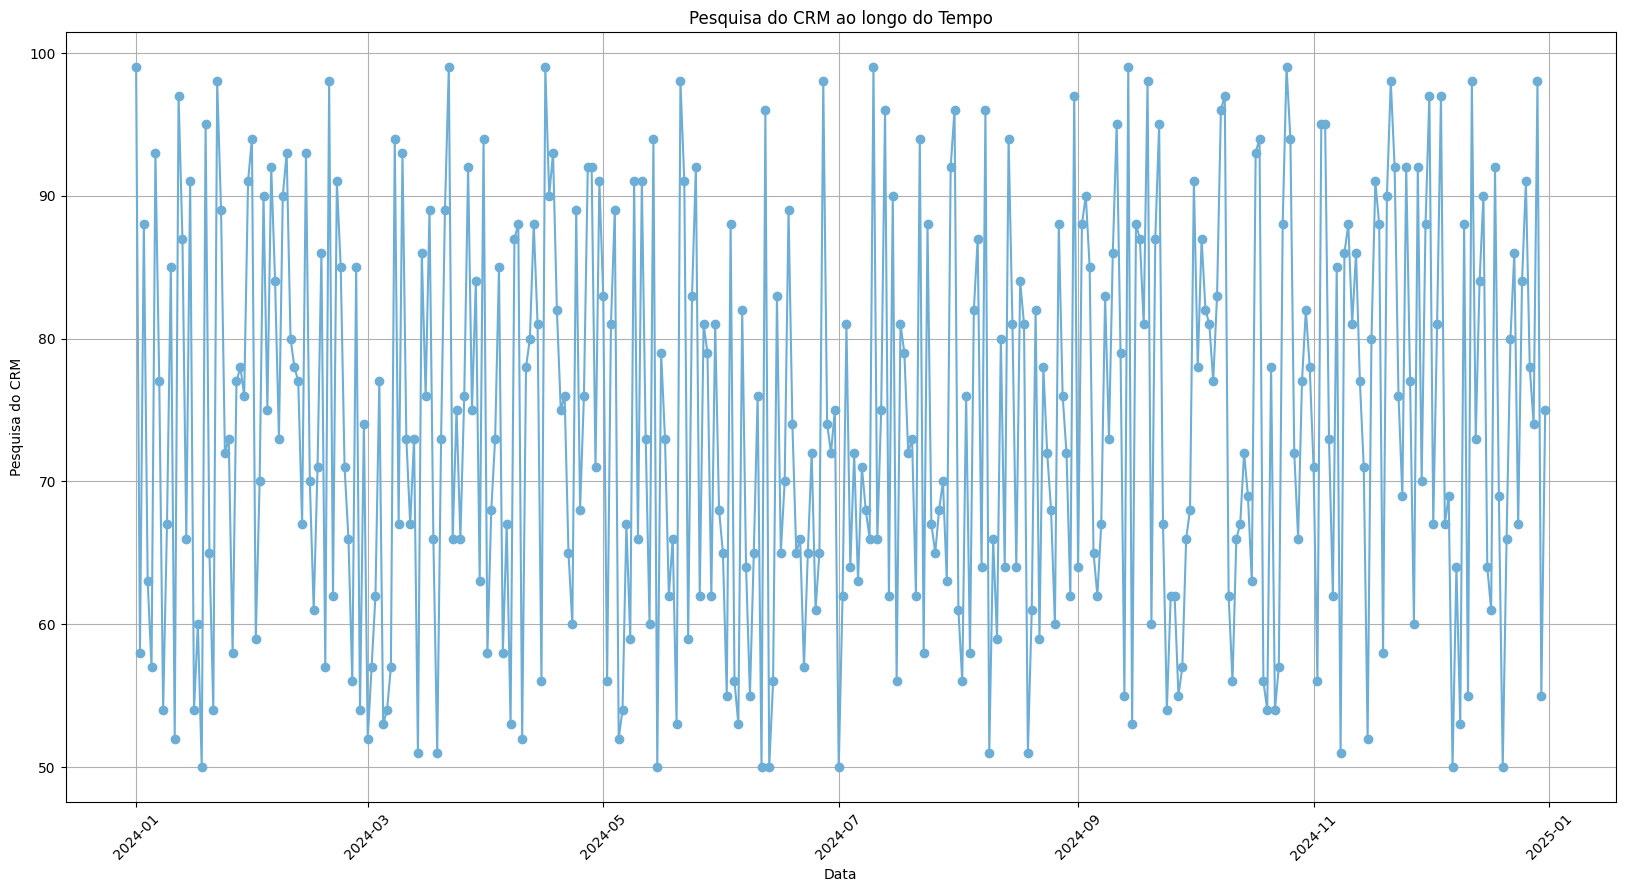

In [8]:
##---------------------( Pesquisa dos nossos produtos por Periodo )---------------------##

# Criar dados de exemplo para a tendência de utilização do CRM ao longo do tempo
data = pd.date_range(start='2024-01-01', end='2024-12-31')
utilizacao_crm = np.random.randint(50, 100, size=len(data))

utilizacao_crm_data = pd.DataFrame({'Data': data, 'Utilização CRM': utilizacao_crm})

# Paleta de cores
paleta_azul = sns.color_palette("Blues_r", 1)

# Gráfico
plt.figure(figsize=(20, 10))
plt.plot(utilizacao_crm_data['Data'], utilizacao_crm_data['Utilização CRM'], marker='o', color=paleta_azul[0])
plt.title('Pesquisa do CRM ao longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Pesquisa do CRM')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


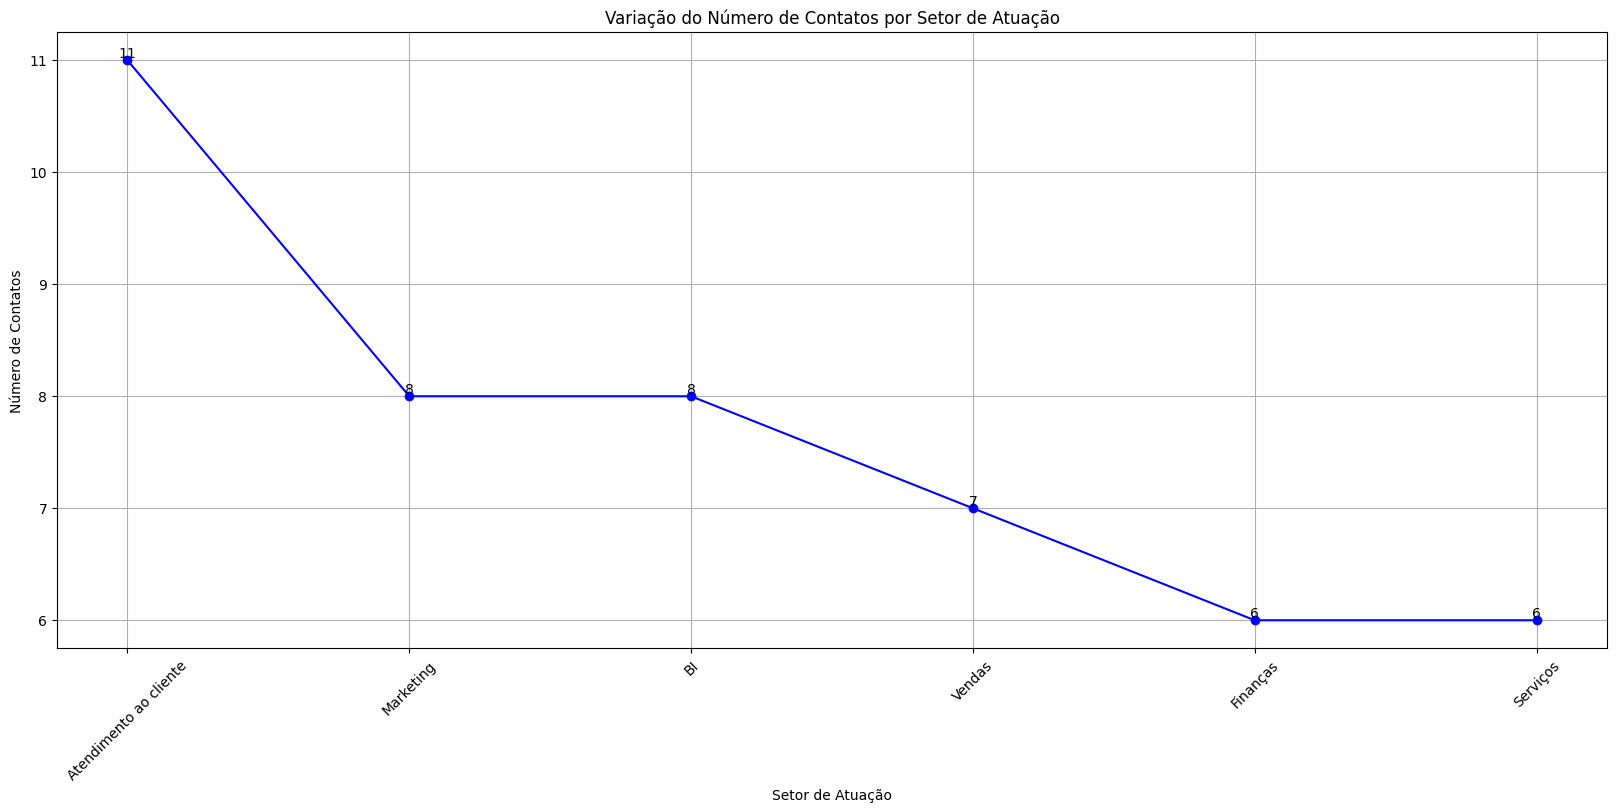

In [9]:
##---------------------( Setor de atuação e quantidade de contatos solicitados )---------------------##

# Agrupar os dados
contagem_contatos_por_setor = dados['SetorAtuacao'].value_counts()

# Gráfico
plt.figure(figsize=(20, 8))
contagem_contatos_por_setor.plot(kind='line', marker='o', color='blue')
plt.title('Variação do Número de Contatos por Setor de Atuação')
plt.xlabel('Setor de Atuação')
plt.ylabel('Número de Contatos')
plt.grid(True)
plt.xticks(rotation=45)

# Adicionar os números em cada bolinha
for i, valor in enumerate(contagem_contatos_por_setor):
    plt.text(i, valor, str(valor), ha='center', va='bottom')

plt.show()


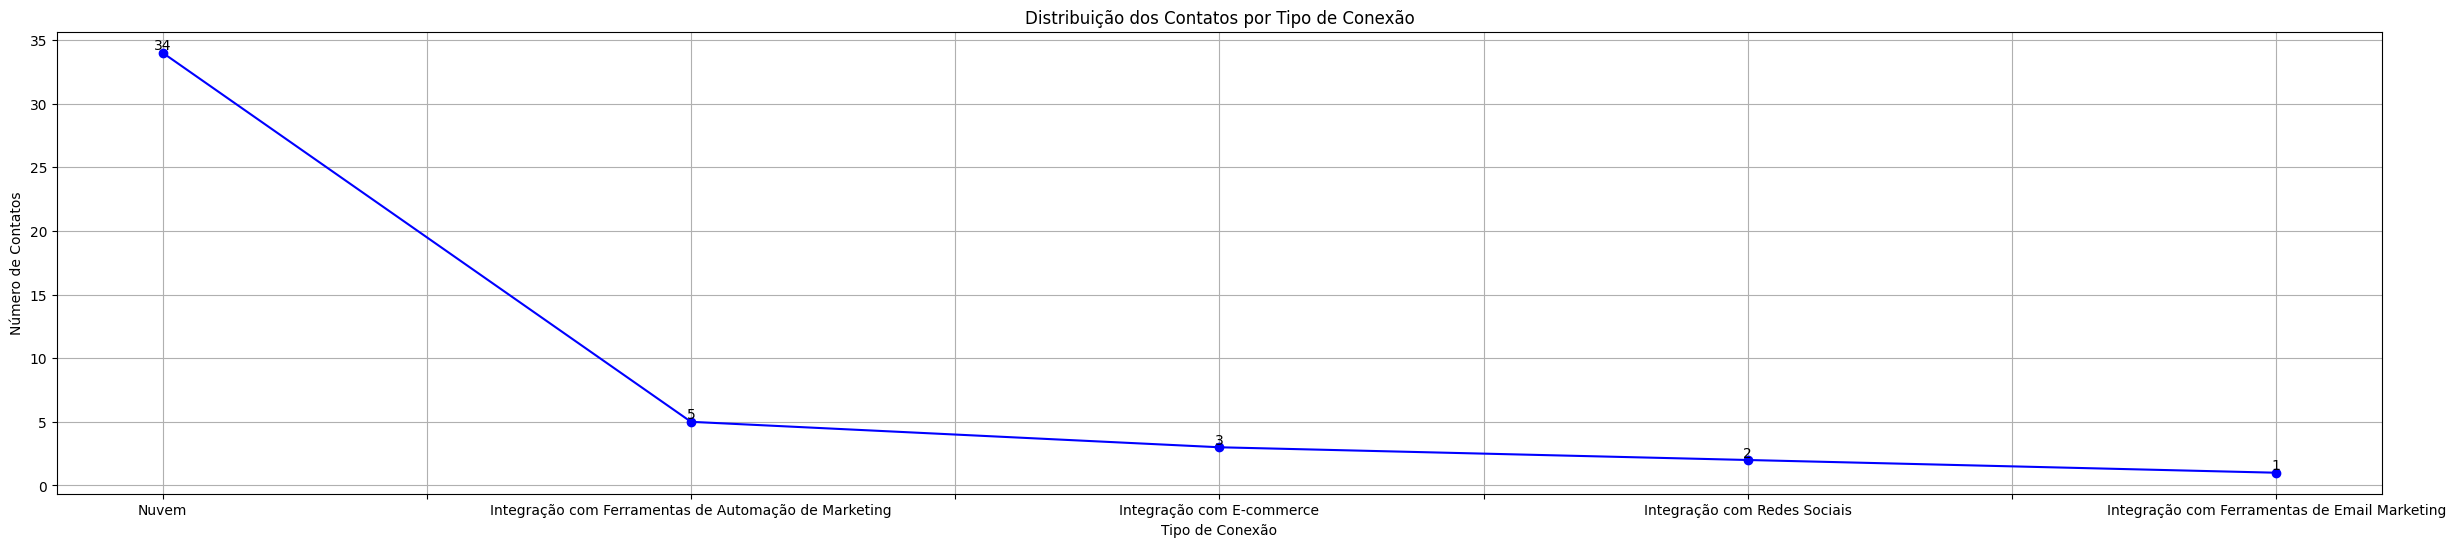

In [28]:
##---------------------( Tipo de conexão )---------------------##

# Contar
contagem_contatos_por_tipo_conexao = dados['TipoConexao'].value_counts()

# Gráfico
plt.figure(figsize=(30, 6))
contagem_contatos_por_tipo_conexao.plot(kind='line', marker='o', color='blue')
plt.title('Distribuição dos Contatos por Tipo de Conexão')
plt.xlabel('Tipo de Conexão')
plt.ylabel('Número de Contatos')
plt.grid(True)

# Adicionar os números em cada bolinha
for i, valor in enumerate(contagem_contatos_por_tipo_conexao):
    plt.text(i, valor, str(valor), ha='center', va='bottom')

plt.show()


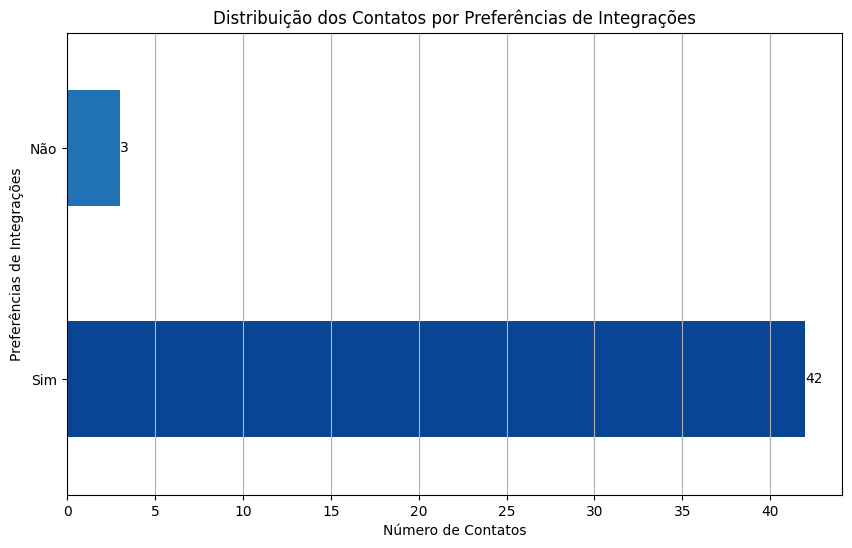

In [29]:
##---------------------( Deseja Integração entre os sistemas? )---------------------##

# Contagem
contagem_por_integracoes = dados['ConhecimentoIntegracoes'].value_counts()

# Paleta de cores
colors = ['#084594', '#2171b5', '#4292c6']

# Gráfico
plt.figure(figsize=(10, 6))
ax = contagem_por_integracoes.plot(kind='barh', color=colors)
plt.title('Distribuição dos Contatos por Preferências de Integrações')
plt.xlabel('Número de Contatos')
plt.ylabel('Preferências de Integrações')
plt.grid(axis='x')

# Adicionando os números em cada barra
for i, v in enumerate(contagem_por_integracoes):
    ax.text(v, i, str(v), ha='left', va='center')

plt.show()


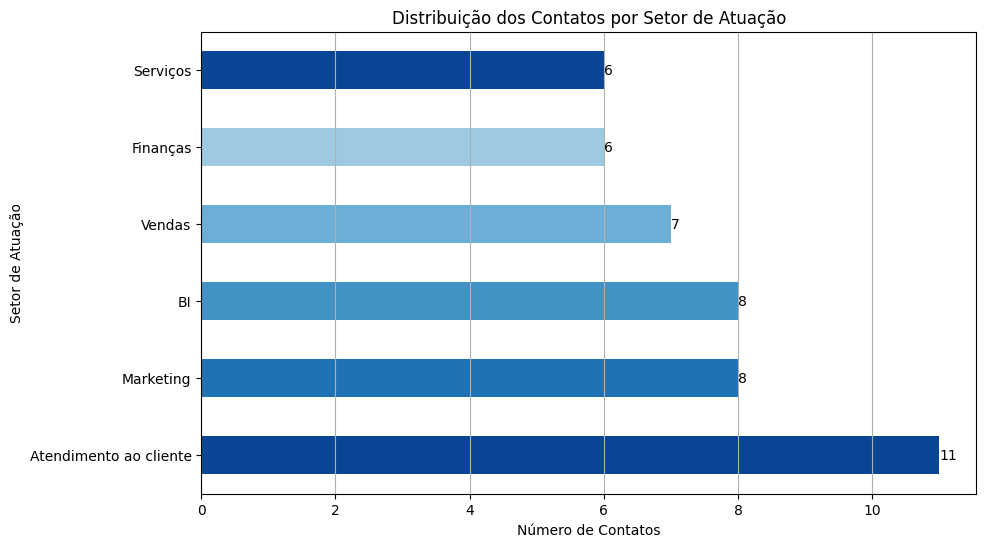

In [30]:
##---------------------( Setor de atuação )---------------------##

# Contagem
contagem_por_setor = dados['SetorAtuacao'].value_counts()

# Paleta de cores em tons de azul
colors = ['#084594', '#2171b5', '#4292c6', '#6baed6', '#9ecae1']

# Gráfico
plt.figure(figsize=(10, 6))
ax = contagem_por_setor.plot(kind='barh', color=colors)
plt.title('Distribuição dos Contatos por Setor de Atuação')
plt.xlabel('Número de Contatos')
plt.ylabel('Setor de Atuação')
plt.grid(axis='x')

# Adicionando os números em cada barra
for i, v in enumerate(contagem_por_setor):
    ax.text(v, i, str(v), ha='left', va='center')

plt.show()
